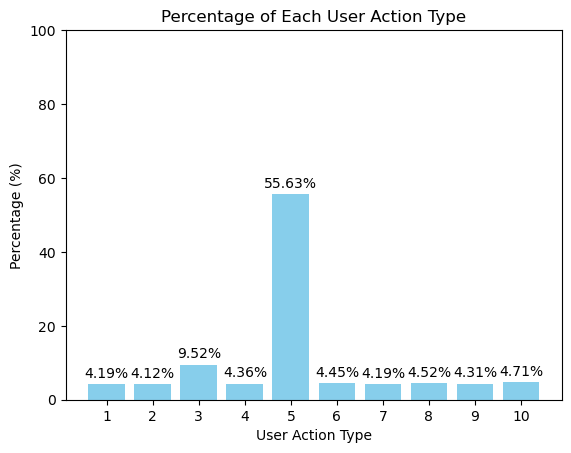

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('data/source_a.csv')

# Calculate the percentages of each user_action_type
action_type_counts = df['user_action_type'].value_counts(normalize=True) * 100
action_type_counts = action_type_counts.sort_index()

# Plot the percentages
plt.figure()
plt.bar(action_type_counts.index, action_type_counts.values, color='skyblue')
plt.xlabel('User Action Type')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Each User Action Type')
plt.xticks(action_type_counts.index)
plt.ylim(0, 100)

# Display the percentages on the bars
for i, v in enumerate(action_type_counts.values):
    plt.text(action_type_counts.index[i], v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Read the JSON lines file
file_path = 'events.jsonl'

# Initialize error counters
error_counters = defaultdict(int)
seen_transaction_uuids = set()

# Read and process each JSON line
with open(file_path, 'r') as file:
    for line in file:
        try:
            record = json.loads(line.strip())
            
             # Check for duplicates
            transaction_uuid = record.get("transaction_uuid", None)
            if transaction_uuid in seen_transaction_uuids:
                error_counters['duplicate'] += 1
            else:
                seen_transaction_uuids.add(transaction_uuid)
                
            # Check for errors
            if 'user_id' not in record or not isinstance(record['user_id'], str) or not record['user_id'].isdigit():
                error_counters['userid_uncastable_to_int'] += 1
            elif 'transaction_uuid' not in record or 'user_action_type' not in record or 'update_date_time' not in record:
                error_counters['missing_field'] += 1
            elif not isinstance(record['user_action_type'], str) or not record['user_action_type'].isdigit():
                error_counters['user_action_type_uncastable_to_int'] += 1
            elif not isinstance(record['update_date_time'], str):
                error_counters['update_date_time_not_string'] += 1
            else:
                try:
                    pd.to_datetime(record['update_date_time'], format='%Y-%m-%d %H:%M:%S')
                except ValueError:
                    error_counters['wrong_date_format'] += 1
        except json.JSONDecodeError:
            error_counters['json_decode_error'] += 1

# Convert error counters to DataFrame
error_df = pd.DataFrame(list(error_counters.items()), columns=['Error Type', 'Count'])
error_df = error_df.sort_values(by='Count', ascending=False)

# Plot the distribution of errors
plt.figure()
plt.bar(error_df['Error Type'], error_df['Count'], color='skyblue')
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.title('Distribution of Errors in JSON Lines File')

# Display the counts on the bars
for i, v in enumerate(error_df['Count']):
    plt.text(i, v + 100, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'events.jsonl'